In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("Groceries_dataset.csv")  
df.head()


Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

In [12]:
# Combine member and date to create a unique transaction ID
df['Transaction'] = df['Member_number'].astype(str) + '_' + df['Date']

# Group by transaction to get list of items per transaction
transactions = df.groupby('Transaction')['itemDescription'].apply(list).tolist()
df.head()

Member_number        Date   itemDescription      Transaction
0           1808  21-07-2015    tropical fruit  1808_21-07-2015
1           2552  05-01-2015        whole milk  2552_05-01-2015
2           2300  19-09-2015         pip fruit  2300_19-09-2015
3           1187  12-12-2015  other vegetables  1187_12-12-2015
4           3037  01-02-2015        whole milk  3037_01-02-2015

In [17]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df.head()


Member_number        Date   itemDescription      Transaction
0           1808  21-07-2015    tropical fruit  1808_21-07-2015
1           2552  05-01-2015        whole milk  2552_05-01-2015
2           2300  19-09-2015         pip fruit  2300_19-09-2015
3           1187  12-12-2015  other vegetables  1187_12-12-2015
4           3037  01-02-2015        whole milk  3037_01-02-2015

In [18]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()


support            itemsets
36  0.157923        (whole milk)
24  0.122101  (other vegetables)
28  0.110005        (rolls/buns)
32  0.097106              (soda)
37  0.085879            (yogurt)

In [19]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='confidence', ascending=False)
rules.head(10)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []

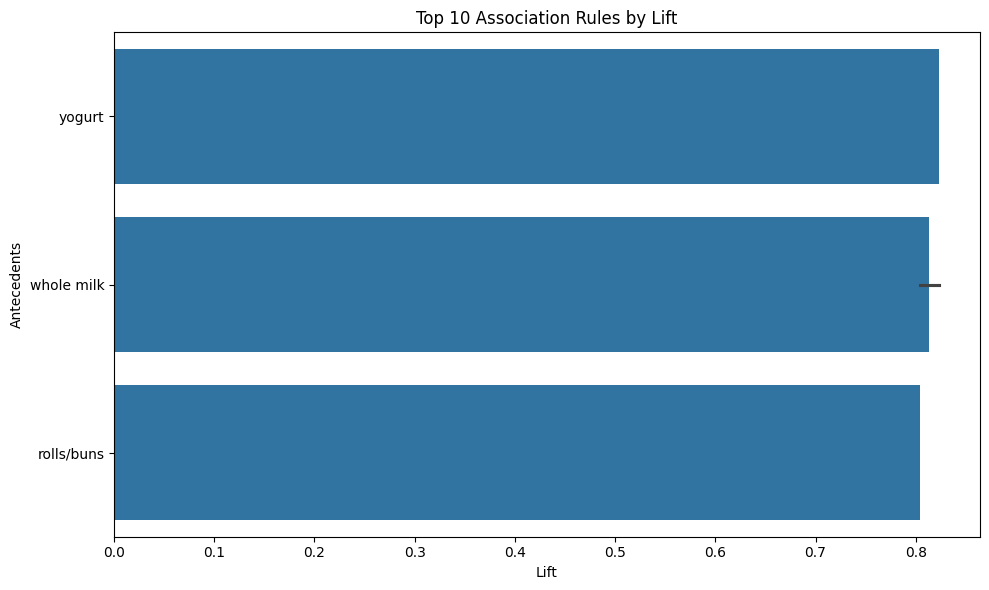

In [20]:
from mlxtend.frequent_patterns import apriori, association_rules

# Generate frequent itemsets with lower support
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate rules with lower lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

# Check if rules exist
if rules.empty:
    print("⚠️ No association rules generated. Try lowering support or lift threshold.")
else:
    # Convert sets to strings
    rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
    
    # Convert lift to numeric
    rules['lift'] = pd.to_numeric(rules['lift'], errors='coerce')
    
    # Get top rules
    top_rules = rules.nlargest(10, 'lift')
    
    # Plot
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lift', y='antecedents_str', data=top_rules)
    plt.title("Top 10 Association Rules by Lift")
    plt.xlabel("Lift")
    plt.ylabel("Antecedents")
    plt.tight_layout()
    plt.show()
